<a href="https://colab.research.google.com/github/S3oudd/eplTopScorers/blob/main/Machine_Learning_EPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PD Stands for player Data
import pandas
import requests
import numpy


pd = pandas.read_csv("Scorers.csv")
pd = pd.sort_values("Gls")
pd = pd.reset_index(drop=True)

pd

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Ryan One,sct SCO,FW,17,1,0,8,0.1,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United
1,Daniel Gore,eng ENG,MF,18,1,0,1,0.0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester United
2,Donny van de Beek,nl NED,DF,26,1,0,3,0.0,0,0,...,0.00,0.00,0.00,0.00,1.09,4.44,5.54,1.09,5.54,Manchester United
3,Ethan Wheatley,eng ENG,FW,17,3,0,16,0.2,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester United
4,Jadon Sancho,eng ENG,"FW,MF",23,3,0,79,0.9,0,0,...,0.00,0.00,0.00,0.00,0.00,0.06,0.06,0.00,0.06,Manchester United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Dominic Solanke,eng ENG,FW,25,38,37,3325,36.9,19,3,...,0.08,0.60,0.46,0.54,0.53,0.08,0.61,0.47,0.55,Bournemouth
576,Ollie Watkins,eng ENG,FW,27,37,37,3217,35.7,19,13,...,0.36,0.90,0.53,0.90,0.47,0.21,0.68,0.47,0.68,Aston Villa
577,Alexander Isak,se SWE,FW,23,30,27,2255,25.1,21,2,...,0.08,0.92,0.64,0.72,0.81,0.15,0.96,0.62,0.77,Newcastle United
578,Cole Palmer,eng ENG,"FW,MF",21,33,29,2607,29.0,22,11,...,0.38,1.14,0.45,0.83,0.63,0.38,1.01,0.38,0.77,Chelsea


In [ ]:

def target(player):
  player["target"] = player["Gls"].shift(-1)
  return player

pd = pd.groupby("Player", group_keys=False).apply(target)



In [ ]:
#pd[pd["Player"] == "Ollie Watkins"]


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,target
576,Ollie Watkins,eng ENG,FW,27,37,37,3217,35.7,19,13,...,0.9,0.53,0.9,0.47,0.21,0.68,0.47,0.68,Aston Villa,NaN


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha = 1)
split = TimeSeriesSplit(n_splits = 3)

sfs = SequentialFeatureSelector(rr, n_features_to_select=15, direction = "forward", cv=split)


In [ ]:
removed_columns = ["Player", "Gls", "target", "Pos", "Age", 'Starts',"Team", "Nation"]
selected_columns = pd.columns[~pd.columns.isin(removed_columns)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pd[selected_columns] = scaler.fit_transform(pd[selected_columns])

In [ ]:
pd

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,target
0,Ryan One,sct SCO,FW,17,0.000000,0.000000,0.002047,0.002632,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Sheffield United,2.0
1,Daniel Gore,eng ENG,MF,18,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Manchester United,2.0
2,Donny van de Beek,nl NED,DF,26,0.000000,0.000000,0.000585,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.337461,1.000000,1.000000,0.337461,1.000000,Manchester United,2.0
3,Ethan Wheatley,eng ENG,FW,17,0.054054,0.000000,0.004387,0.005263,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Manchester United,2.0
4,Jadon Sancho,eng ENG,"FW,MF",23,0.054054,0.000000,0.022814,0.023684,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.013514,0.010830,0.000000,0.010830,Manchester United,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Dominic Solanke,eng ENG,FW,25,1.000000,0.973684,0.972214,0.971053,19,0.230769,...,0.226415,0.173585,0.203774,0.164087,0.018018,0.110108,0.145511,0.099278,Bournemouth,2.0
576,Ollie Watkins,eng ENG,FW,27,0.972973,0.973684,0.940626,0.939474,19,1.000000,...,0.339623,0.200000,0.339623,0.145511,0.047297,0.122744,0.145511,0.122744,Aston Villa,2.0
577,Alexander Isak,se SWE,FW,23,0.783784,0.710526,0.659257,0.660526,21,0.153846,...,0.347170,0.241509,0.271698,0.250774,0.033784,0.173285,0.191950,0.138989,Newcastle United,2.0
578,Cole Palmer,eng ENG,"FW,MF",21,0.864865,0.763158,0.762211,0.763158,22,0.846154,...,0.430189,0.169811,0.313208,0.195046,0.085586,0.182310,0.117647,0.138989,Chelsea,2.0


In [ ]:
sfs.fit(pd[selected_columns], pd["target"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=15)

In [ ]:
predictors = list(selected_columns[sfs.get_support()])
predictors

['MP',
 'Starts',
 'Min',
 '90s',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'xG',
 'npxG',
 'xAG',
 'npxG+xAG']

In [ ]:
def test(data, model, predictors, start=2, step=1):
  totalPredictions = []

  Gls_values = sorted(data["Gls"].unique())
  xG = sorted(data["xG_90"].unique())

  for i in range(start, len(Gls_values), step):
    Gls = Gls_values[i]

    data_test = data[data["Gls"] == Gls]
    data_train = data[data["Gls"] != Gls]

    model.fit(data_train[predictors], data_train["target"])

    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index)
    preds.name = "predictions"

    combined = pd.concat([test["target"], preds], axis=1)
    combined.columns = ["target", "predictions"]

    totalPredictions.append(combined)
    return combined

In [ ]:
predictions = test(pd, rr, predictors)

In [ ]:
predictions

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,target,Predictions
0,Ryan One,sct SCO,FW,17,0.000000,0.000000,0.002047,0.002632,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Sheffield United,2.0,None
1,Daniel Gore,eng ENG,MF,18,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Manchester United,2.0,None
2,Donny van de Beek,nl NED,DF,26,0.000000,0.000000,0.000585,0.000000,0,0.000000,...,0.000000,0.000000,0.337461,1.000000,1.000000,0.337461,1.000000,Manchester United,2.0,None
3,Ethan Wheatley,eng ENG,FW,17,0.054054,0.000000,0.004387,0.005263,0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Manchester United,2.0,None
4,Jadon Sancho,eng ENG,"FW,MF",23,0.054054,0.000000,0.022814,0.023684,0,0.000000,...,0.000000,0.000000,0.000000,0.013514,0.010830,0.000000,0.010830,Manchester United,2.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Dominic Solanke,eng ENG,FW,25,1.000000,0.973684,0.972214,0.971053,19,0.230769,...,0.173585,0.203774,0.164087,0.018018,0.110108,0.145511,0.099278,Bournemouth,2.0,7
576,Ollie Watkins,eng ENG,FW,27,0.972973,0.973684,0.940626,0.939474,19,1.000000,...,0.200000,0.339623,0.145511,0.047297,0.122744,0.145511,0.122744,Aston Villa,2.0,8
577,Alexander Isak,se SWE,FW,23,0.783784,0.710526,0.659257,0.660526,21,0.153846,...,0.241509,0.271698,0.250774,0.033784,0.173285,0.191950,0.138989,Newcastle United,2.0,9
578,Cole Palmer,eng ENG,"FW,MF",21,0.864865,0.763158,0.762211,0.763158,22,0.846154,...,0.169811,0.313208,0.195046,0.085586,0.182310,0.117647,0.138989,Chelsea,2.0,9


           Player   Nation    Pos  Age  MP  Starts   Min   90s  Gls  Ast  ...  \
0           Rodri   es ESP     MF   27  34      34  2931  32.6    8    9  ...   
1      Phil Foden  eng ENG  FW,MF   23  35      33  2857  31.7   19    8  ...   
2         Ederson   br BRA     GK   29  33      33  2785  30.9    0    0  ...   
3  Julián Álvarez   ar ARG  MF,FW   23  36      31  2647  29.4   11    8  ...   
4     Kyle Walker  eng ENG     DF   33  32      30  2767  30.7    0    4  ...   

   Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  \
0    0.28    0.52     0.25       0.52   0.12    0.12       0.24     0.12   
1    0.25    0.85     0.60       0.85   0.33    0.26       0.59     0.33   
2    0.00    0.00     0.00       0.00   0.00    0.00       0.00     0.00   
3    0.27    0.65     0.31       0.58   0.44    0.22       0.66     0.39   
4    0.13    0.13     0.00       0.13   0.01    0.09       0.10     0.01   

   npxG+xAG_90             Team  
0         0.24  Manche

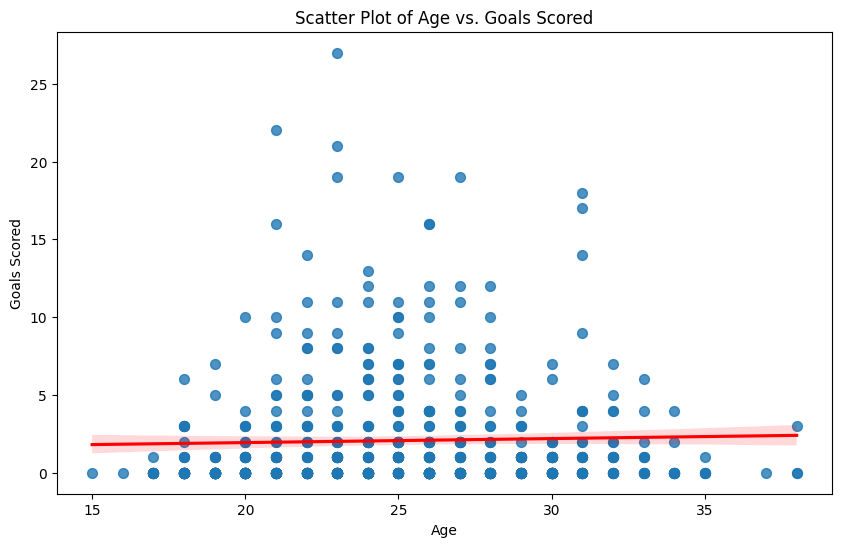

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("Scorers.csv")

print(data.head())

correlation_matrix = data[['Age', 'Gls']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


predictors = ['Age']
target = 'Gls'

X = data[predictors]
y = data[target]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print("\nLinear Regression Summary:")
print(model.summary())


plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Gls', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot of Age vs. Goals Scored')
plt.xlabel('Age')
plt.ylabel('Goals Scored')
plt.show()


           Player   Nation    Pos  Age  MP  Starts   Min   90s  Gls  Ast  ...  \
0           Rodri   es ESP     MF   27  34      34  2931  32.6    8    9  ...   
1      Phil Foden  eng ENG  FW,MF   23  35      33  2857  31.7   19    8  ...   
2         Ederson   br BRA     GK   29  33      33  2785  30.9    0    0  ...   
3  Julián Álvarez   ar ARG  MF,FW   23  36      31  2647  29.4   11    8  ...   
4     Kyle Walker  eng ENG     DF   33  32      30  2767  30.7    0    4  ...   

   Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  \
0    0.28    0.52     0.25       0.52   0.12    0.12       0.24     0.12   
1    0.25    0.85     0.60       0.85   0.33    0.26       0.59     0.33   
2    0.00    0.00     0.00       0.00   0.00    0.00       0.00     0.00   
3    0.27    0.65     0.31       0.58   0.44    0.22       0.66     0.39   
4    0.13    0.13     0.00       0.13   0.01    0.09       0.10     0.01   

   npxG+xAG_90             Team  
0         0.24  Manche

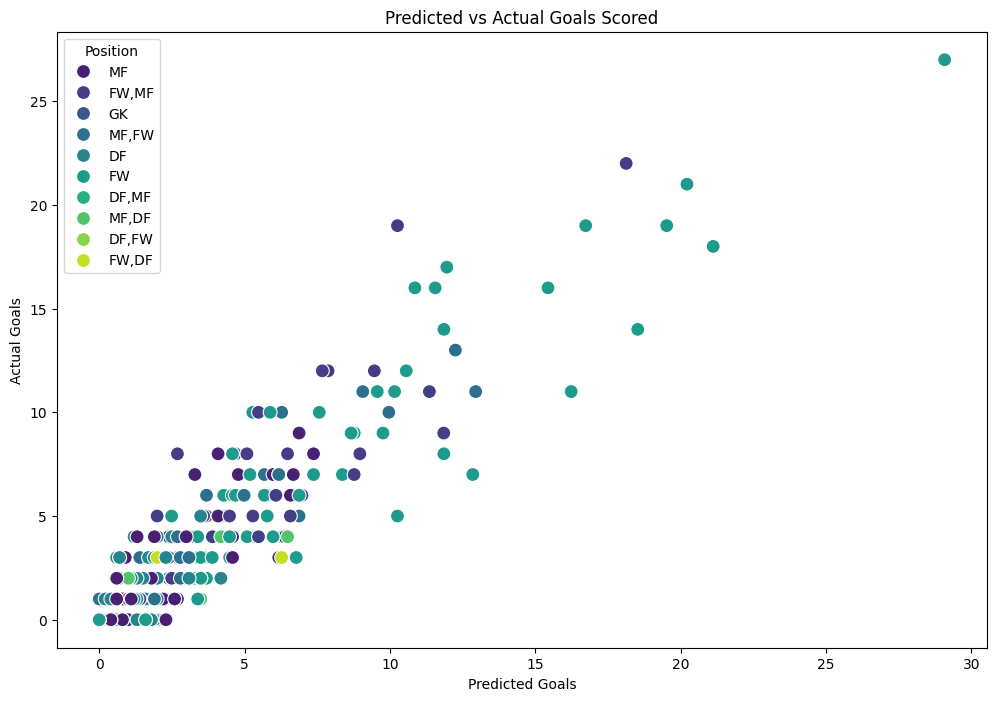

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

data = pd.read_csv('Scorers.csv')

print(data.head())

predictors = ['Age', 'xG']
target = 'Gls'

X = data[predictors]
y = data[target]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()


data['Predicted_Gls'] = model.predict(X)

top_players = data[['Player', 'Age', 'xG', 'Gls', 'Predicted_Gls']].sort_values(by='Predicted_Gls', ascending=False)

print("\nPlayers with Highest Predicted Goals:")
print(top_players.head(10))

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Predicted_Gls', y='Gls', data=data, hue='Pos', palette='viridis', s=100)
plt.title('Predicted vs Actual Goals Scored')
plt.xlabel('Predicted Goals')
plt.ylabel('Actual Goals')
plt.legend(title='Position')
plt.show()
